# Keep top 100 CBSAs

In [1]:
import pandas as pd
import datetime
import psycopg2
import numpy as np
import os
import seaborn as sns
pd.set_option("display.max_columns",999)

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

conn = psycopg2.connect(
    host = 'lease-data.cnzawwknyviz.us-east-1.rds.amazonaws.com',
    port = 5432,
    user = 'costar',
    password = 'Costar12',
    database='costar'
    )
cursor = conn.cursor() 



###  Read the merged lease data in AWS

In [2]:
data = pd.read_sql(
'''
SELECT *
FROM lease_merged_sep
''', con = conn)

###  Create a dataframe

In [3]:
lease = pd.DataFrame(data)

lease.head(1)

,leasedeal_id,property_id,renewal,sqft_min,sqft_max,date_on_market,date_off_market,days_on_market,actual_vacancy,from_date,todate,lease_sign_date,lease_expiration_date,lease_term_inmonths,rate_actual,estimated_rent,service_type_id,property_type_id,location_occupancy_id,rba,tenantimprovementallowancepersqft,free_months,construction_year,buildingrating_id,researchmarket_name,cbsaid,cbsa_cities,cbsa_states,submarket_name,zip
0,"10,944,687.00",286611,1.00,NaN,NaN,None,None,NaN,NaN,1998-03-01,2008-06-01,1997-12-19,2005-03-01,84.00,NaN,22.84,13.00,5.00,"10,944,687.00","43,920.00",NaN,NaN,"1,997.00",3.00,Orange County (California),"11,244.00",Anaheim-Santa Ana-Irvine,CA,Irvine Spectrum,"92,618.00"


###  Get a count of Property IDs for each CBSA

In [4]:
cbsa_groups = lease.groupby('cbsaid')['property_id'].count().reset_index()

cbsa_groups.rename(columns = {cbsa_groups.columns[1]: 'property_count' }, inplace = True)

top_100 = cbsa_groups.sort_values(by = ['property_count'], ascending = False).head(100)

###  Merge the counts into the existing lease dataframe

In [5]:
lease2 = pd.merge(lease, top_100, on = 'cbsaid', how = 'left')

# comparing row counts, i get the same count for raw and merged:
lease2[lease2['cbsaid'] == 39580.00]

#lease[lease['cbsaid'] == 39580.00]

,leasedeal_id,property_id,renewal,sqft_min,sqft_max,date_on_market,date_off_market,days_on_market,actual_vacancy,from_date,todate,lease_sign_date,lease_expiration_date,lease_term_inmonths,rate_actual,estimated_rent,service_type_id,property_type_id,location_occupancy_id,rba,tenantimprovementallowancepersqft,free_months,construction_year,buildingrating_id,researchmarket_name,cbsaid,cbsa_cities,cbsa_states,submarket_name,zip,property_count
31,"114,159,594.00",67717,NaN,NaN,NaN,None,None,NaN,NaN,2014-02-14,None,2013-02-06,2014-02-05,12.00,NaN,14.07,NaN,5.00,"123,028,893.00",500.00,NaN,NaN,"1,976.00",2.00,Raleigh/Durham,"39,580.00",Raleigh,NC,Glenwood/Creedmoor,"27,612.00","7,782.00"
62,"110,599,906.00",67517,NaN,"2,157.00","2,157.00",2005-12-31,2007-03-31,455.00,0.00,2007-02-28,2010-08-31,2007-01-29,2010-09-01,43.00,NaN,19.27,11.00,5.00,"112,425,126.00","2,157.00",NaN,NaN,"1,991.00",4.00,Raleigh/Durham,"39,580.00",Raleigh,NC,Downtown Raleigh,"27,601.00","7,782.00"
72,"30,018,092.00",67777,NaN,NaN,NaN,None,None,NaN,NaN,1993-09-15,2003-01-16,1993-08-16,1999-08-14,72.00,NaN,NaN,11.00,5.00,"30,018,092.00",NaN,NaN,NaN,"1,981.00",3.00,None,"39,580.00",Raleigh,NC,None,NaN,"7,782.00"
245,"111,519,047.00",67759,NaN,NaN,NaN,None,None,NaN,NaN,2009-04-01,2016-01-24,2009-03-01,2012-04-01,36.00,NaN,18.57,NaN,5.00,"114,525,366.00","1,046.00",NaN,NaN,"1,994.00",2.00,Raleigh/Durham,"39,580.00",Raleigh,NC,Cary,"27,518.00","7,782.00"
359,"30,018,020.00",67754,NaN,NaN,NaN,None,None,NaN,NaN,2002-06-16,2010-06-30,2002-06-16,2009-06-30,96.00,NaN,20.17,NaN,5.00,"30,018,020.00","4,600.00",NaN,NaN,"1,995.00",3.00,Raleigh/Durham,"39,580.00",Raleigh,NC,West Raleigh,"27,607.00","7,782.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066466,"10,389,483.00",68394,NaN,NaN,NaN,None,None,NaN,NaN,2001-01-01,2001-01-01,2000-11-10,2006-01-01,60.00,NaN,18.57,NaN,5.00,"10,389,483.00","2,300.00",NaN,NaN,"2,000.00",3.00,Raleigh/Durham,"39,580.00",Raleigh,NC,6 Forks Falls of Neuse,"27,615.00","7,782.00"
1066536,"30,017,188.00",67555,NaN,NaN,NaN,None,None,NaN,NaN,2001-06-16,2015-01-31,2001-06-01,2006-03-01,163.00,NaN,20.05,NaN,5.00,"30,017,188.00","1,904.00",NaN,NaN,"1,984.00",4.00,Raleigh/Durham,"39,580.00",Raleigh,NC,West Raleigh,"27,608.00","7,782.00"
1066702,"30,017,972.00",67743,NaN,NaN,NaN,None,None,NaN,NaN,1987-01-15,1999-02-28,1986-12-16,1999-08-14,151.00,NaN,NaN,11.00,5.00,"30,017,972.00",NaN,NaN,NaN,"1,962.00",2.00,None,"39,580.00",Raleigh,NC,None,NaN,"7,782.00"
1066793,"10,632,220.00",67516,NaN,NaN,NaN,None,None,NaN,NaN,2004-06-01,2009-05-30,2004-05-01,2009-05-31,60.00,NaN,18.80,NaN,5.00,"10,632,220.00","2,400.00",NaN,NaN,"1,986.00",4.00,Raleigh/Durham,"39,580.00",Raleigh,NC,RTP/RDU,"27,560.00","7,782.00"


In [ ]:
# lease2.to_csv('lease2.csv', index = False)

###  Create a new DF, filtering out rows where Property Count = 0

In [6]:
top_100_cbsa = lease2[lease2['property_count'] > 0]

top_100_cbsa.head()

,leasedeal_id,property_id,renewal,sqft_min,sqft_max,date_on_market,date_off_market,days_on_market,actual_vacancy,from_date,todate,lease_sign_date,lease_expiration_date,lease_term_inmonths,rate_actual,estimated_rent,service_type_id,property_type_id,location_occupancy_id,rba,tenantimprovementallowancepersqft,free_months,construction_year,buildingrating_id,researchmarket_name,cbsaid,cbsa_cities,cbsa_states,submarket_name,zip,property_count
0,"10,944,687.00",286611,1.00,NaN,NaN,None,None,NaN,NaN,1998-03-01,2008-06-01,1997-12-19,2005-03-01,84.00,NaN,22.84,13.00,5.00,"10,944,687.00","43,920.00",NaN,NaN,"1,997.00",3.00,Orange County (California),"11,244.00",Anaheim-Santa Ana-Irvine,CA,Irvine Spectrum,"92,618.00","24,748.00"
1,"111,789,078.00",29431,NaN,"1,050.00","1,050.00",2009-03-31,2010-03-31,365.00,1.00,2010-01-10,2013-05-31,2009-12-11,2015-01-10,60.00,NaN,19.22,13.00,5.00,"116,361,584.00","1,050.00",NaN,NaN,"1,987.00",3.00,Detroit,"19,820.00",Detroit-Warren-Dearborn,MI,Central I-96 Corridor,"48,377.00","21,877.00"
2,"10,591,400.00",321243,NaN,NaN,NaN,None,None,NaN,NaN,2002-01-01,2017-09-30,2001-11-01,2018-06-30,197.00,NaN,23.69,NaN,5.00,"10,591,400.00","3,004.00",NaN,NaN,"1,907.00",3.00,San Francisco,"41,884.00",San Francisco-Redwood City-South San Francisco,CA,MidMarket,"94,103.00","18,460.00"
3,"117,978,801.00",129516,NaN,"1,041.00","1,041.00",2014-09-30,2015-06-30,273.00,1.00,2015-05-01,2017-04-30,2015-04-01,2018-04-30,36.00,NaN,41.23,7.00,5.00,"130,577,601.00","1,041.00",NaN,NaN,"1,908.00",3.00,"Washington, DC","47,900.00",Washington-Arlington-Alexandria,DC-VA-MD-WV,Georgetown,"20,007.00","58,072.00"
4,"130,616,571.00",248031,NaN,"1,791.00","1,791.00",2016-12-31,2017-09-30,273.00,1.00,2017-07-21,2019-08-19,2017-06-21,2018-07-21,12.00,NaN,48.33,7.00,5.00,"179,728,571.00","1,791.00",NaN,NaN,"1,978.00",3.00,Los Angeles,"31,084.00",Los Angeles-Long Beach-Glendale,CA,Santa Monica,"90,405.00","69,617.00"


### leasedeal_id & property_id vs original data set

In [7]:
pct_leaseid = top_100_cbsa.leasedeal_id.nunique()/lease2.leasedeal_id.nunique()*100
pct_propertyid = top_100_cbsa.property_id.nunique()/lease2.property_id.nunique()*100

print(f"# of leasedeal_id's in top 100 CBSA's:   {top_100_cbsa.leasedeal_id.nunique()}")
print(f"# of leasedeal_id's in all CBSA's:   {lease2.leasedeal_id.nunique()}")
print(f"% of leasedeal_id's in top 100 CBSA's: {pct_leaseid:.1f}%")
print('\r')
print(f"# of property_id's in top 100 CBSA's:   {top_100_cbsa.property_id.nunique()}")
print(f"# of property_id's in all CBSA's:   {lease2.property_id.nunique()}")
print(f"% of property_id's in top 100 CBSA's: {pct_propertyid:.1f}%")

# of leasedeal_id's in top 100 CBSA's:   981192
# of leasedeal_id's in all CBSA's:   1057504
% of leasedeal_id's in top 100 CBSA's: 92.8%

# of property_id's in top 100 CBSA's:   141212
# of property_id's in all CBSA's:   176821
% of property_id's in top 100 CBSA's: 79.9%


In [31]:
top_100_cbsa.shape

(990022, 33)

# Create Features/Clean Existing

In [59]:
#shorten df name
dfm = top_100_cbsa


(990022, 33)

In [60]:
dfm = dfm.drop(columns = ['rent_ratio', 'ti_ratio'])
dfm.shape

(990022, 31)

#### Create rent_ratio column

In [61]:
#establish rent_ratio (ratio of actual rent to estimated rent)

dfm['rent_ratio'] = dfm.rate_actual / dfm.estimated_rent
dfm.rent_ratio = pd.to_numeric(dfm.rent_ratio)

#### Create ti_ratio column

In [64]:
# establish rent_ratio & fill fill na with ''
dfm['ti_ratio'] = dfm.tenantimprovementallowancepersqft / dfm.rate_actual
dfm.ti_ratio = pd.to_numeric(dfm.ti_ratio)
dfm.ti_ratio = dfm.ti_ratio[dfm.ti_ratio > 0]

#### Clean Renewal

In [112]:
#replace null w/ 0 to create binary variable
dfm.renewal = dfm.renewal.fillna(0)
dfm.renewal = dfm.renewal.astype(np.int64)
dfm.renewal.value_counts()
# dfm.renewal.head(100)

0    840319
1    149703
Name: renewal, dtype: int64

#### Clean Free Months

In [147]:
#replace 0 with 'NaN' 
dfm.free_months = dfm.free_months.replace(0, np.nan)
#dfm.free_months = dfm.free_months.astype(np.int64)
dfm.free_months.value_counts()

1.00      51128
2.00      47625
3.00       5501
4.00       1849
5.00       1566
6.00       1079
7.00        778
9.00        200
8.00        188
12.00       179
13.00       113
10.00        98
11.00        72
24.00        38
15.00        24
18.00        14
17.00        12
14.00        12
19.00        11
16.00        11
25.00        10
36.00         9
26.00         7
21.00         5
23.00         5
22.00         4
30.00         4
61.00         3
72.00         2
60.00         2
31.00         2
37.00         1
120.00        1
20.00         1
29.00         1
71.00         1
180.00        1
48.00         1
185.00        1
39.00         1
Name: free_months, dtype: int64

# Statistics, Histograms & Outlier Removal

In [95]:
dfm.describe().T

,count,mean,std,min,25%,50%,75%,max
leasedeal_id,"990,022.00","89,221,126.87","41,467,994.65","10,000,015.00","70,005,475.00","111,165,431.00","113,368,384.25","187,388,961.00"
property_id,"990,022.00","963,683.58","1,860,956.06",1.00,"161,558.00","378,449.00","609,332.00","11,605,746.00"
sqft_min,"528,652.00","2,955.28","5,855.97",1.00,900.00,"1,564.00","3,000.00","496,984.00"
sqft_max,"528,652.00","3,270.77","6,605.81",1.00,941.00,"1,649.00","3,200.00","496,984.00"
days_on_market,"528,652.00",599.95,690.01,0.00,182.00,365.00,821.00,"11,506.00"
actual_vacancy,"528,652.00",0.88,0.33,0.00,1.00,1.00,1.00,1.00
lease_term_inmonths,"990,022.00",49.12,40.32,-395.00,24.00,36.00,60.00,"1,236.00"
rate_actual,"185,020.00",23.00,345.46,0.00,13.00,17.16,23.00,"84,000.00"
estimated_rent,"856,082.00",23.33,11.12,1.56,16.75,20.73,26.44,"1,222.86"
service_type_id,"762,388.00",8.19,2.82,1.00,7.00,7.00,9.00,19.00


## Attributes

In [ ]:
#TODO: seaborn ridgeplot per cbsa: https://seaborn.pydata.org/examples/kde_ridgeplot.html


#### Functions

In [42]:
def desc_stat_col(column):
    '''quick function that produces 
        descriptive stats on a chosen column'''

    pcts = [.01, .05, .10, .25, .5, .75, .90, .95, .99]

    df = dfm[column]
    
    print('DESCRIPTIVE STATS WITHOUT MODIFICATIONS:')
    print('\r')
    print(df.describe(percentiles = pcts).T)

In [75]:
def make_hist(column, bins, lower_pct, upper_pct, color):
    '''Produces descr stats, 
        removes lower & upper bounds (if desired),
        produces histogram'''
    
    df = dfm
    
    min_down = df.days_on_market.min()
    
    range_min = df[column].quantile(lower_pct)
    range_max = df[column].quantile(upper_pct)
    
    print('\r')
    print('\r')
    print(f'HISTOGRAM WITH LOWER & UPPER BOUNDS REMOVED, lower: {lower_pct*100}%, upper: {upper_pct*100}%')
    df[column].hist(bins = bins, range = (range_min, range_max), color = color)

In [44]:
def make_violin(column, color):

    sns.set_theme(style="whitegrid")
    ax = sns.violinplot(data = dfm, x=dfm[column], color = color, width = 2)   
    
# make_violin('days_on_market', 'red')
# make_violin('new_days_on_market', 'green')

In [218]:
def create_tag_column(column, lower_pct, upper_pct):
    
    new_column = 'new_' + column
    min_range = dfm[column].quantile(lower_pct)
    max_range = dfm[column].quantile(upper_pct)

    dfm[new_column] = dfm[column][(dfm[column] <= min_range) & (dfm[column] <= max_range)]
    print('\r')
    print(f'NEW COLUMN CREATED WITH UPPER & LOWER BOUNDS: {dfm.columns[-1]}')
    print(f'Data Frame shape: {dfm.shape}')


### Downtime

DESCRIPTIVE STATS WITHOUT MODIFICATIONS:

count   528,652.00
mean        599.95
std         690.01
min           0.00
1%            0.00
5%            0.00
10%          91.00
25%         182.00
50%         365.00
75%         821.00
90%       1,461.00
95%       2,010.00
99%       3,287.00
max      11,506.00
Name: days_on_market, dtype: float64


HISTOGRAM WITH LOWER & UPPER BOUNDS REMOVED, lower: 0%, upper: 95.0%

NEW COLUMN CREATED WITH UPPER & LOWER BOUNDS: new_days_on_market
Data Frame shape: (990022, 34)


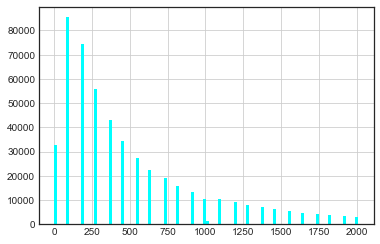

In [221]:
'''DOWNTIME: 
    Rows above 95 percentile were eliminated
    for downtime per Rob's instruction; landlords
    often have buildings off market for major rennovations.'''

# parameters: column
desc_stat_col('days_on_market')

# parameters: column, bins, lower_pct, upper_pct, color
make_hist('days_on_market', 100, 0, .95, 'aqua')

# parameters: column, lower, upper 
create_tag_column('days_on_market', 0, .95)


### Free Months

DESCRIPTIVE STATS WITHOUT MODIFICATIONS:

count   110,560.00
mean          1.84
std           1.79
min           1.00
1%            1.00
5%            1.00
10%           1.00
25%           1.00
50%           2.00
75%           2.00
90%           3.00
95%           4.00
99%           7.00
max         185.00
Name: free_months, dtype: float64


HISTOGRAM WITH LOWER & UPPER BOUNDS REMOVED, lower: 0%, upper: 99.0%

NEW COLUMN CREATED WITH UPPER & LOWER BOUNDS: new_free_months
Data Frame shape: (990022, 35)


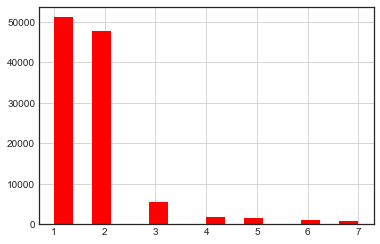

In [222]:
'''FREE MONTHS: 
    represented in # of free months...
    but could do as ratio...
    TODO: decide on abs value or relative pct/ratio'''

# parameters: column
desc_stat_col('free_months')

# parameters: column, bins, lower_pct, upper_pct, color
make_hist('free_months', 16, 0, .99, 'red')

# parameters: column, lower, upper 
create_tag_column('free_months', 0, .99)

### Tenant Improvement

DESCRIPTIVE STATS WITHOUT MODIFICATIONS:

count   3,291.00
mean        3.10
std        27.87
min         0.00
1%          0.02
5%          0.07
10%         0.13
25%         0.27
50%         0.59
75%         1.18
90%         1.89
95%         2.45
99%        43.14
max       664.30
Name: ti_ratio, dtype: float64


HISTOGRAM WITH LOWER & UPPER BOUNDS REMOVED, lower: 0%, upper: 95.0%

NEW COLUMN CREATED WITH UPPER & LOWER BOUNDS: new_ti_ratio
Data Frame shape: (990022, 36)


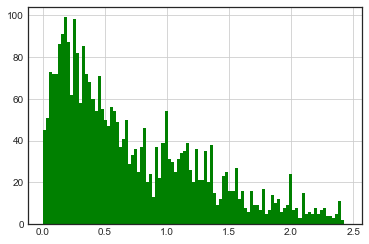

In [225]:
'''TENANT IMPROVEMENT:
    calculated as ratio of tenantimprovementallowancepersqft
    and rent_actual, expressed in %'''

# parameters: column
desc_stat_col('ti_ratio')

# parameters: column, bins, lower_pct, upper_pct, color
make_hist('ti_ratio', 100, 0, .95, 'green')

# parameters: column, lower, upper 
create_tag_column('ti_ratio', 0, .95)

### Lease Term

DESCRIPTIVE STATS WITHOUT MODIFICATIONS:

count   990,022.00
mean         49.12
std          40.32
min        -395.00
1%            0.00
5%           12.00
10%          12.00
25%          24.00
50%          36.00
75%          60.00
90%         108.00
95%         120.00
99%         192.00
max       1,236.00
Name: lease_term_inmonths, dtype: float64


HISTOGRAM WITH LOWER & UPPER BOUNDS REMOVED, lower: 1.0%, upper: 99.0%

NEW COLUMN CREATED WITH UPPER & LOWER BOUNDS: new_lease_term_inmonths
Data Frame shape: (990022, 37)


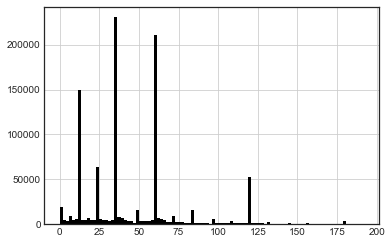

In [226]:
'''lease term in months'''

# parameters: column
desc_stat_col('lease_term_inmonths')

# parameters: column, bins, lower_pct, upper_pct, color
make_hist('lease_term_inmonths', 100, .01, .99, 'black')

# parameters: column, lower, upper 
create_tag_column('lease_term_inmonths', .01, .99)

### Renewal

In [230]:
'''LEASE TERM:
    provided values (in months) are used'''

# #pie chart
# renew = dfm.renewal.to_numpy()
# plt.pie(renew)
# plt.show()

dfm['new_renewal'] = dfm.renewal
dfm.shape

(990022, 38)

### Rent Ratio

DESCRIPTIVE STATS WITHOUT MODIFICATIONS:

count   183,085.00
mean          1.07
std          16.52
min           0.00
1%            0.37
5%            0.54
10%           0.63
25%           0.77
50%           0.91
75%           1.01
90%           1.13
95%           1.25
99%           1.79
max       3,344.60
Name: rent_ratio, dtype: float64


HISTOGRAM WITH LOWER & UPPER BOUNDS REMOVED, lower: 1.0%, upper: 99.0%

NEW COLUMN CREATED WITH UPPER & LOWER BOUNDS: new_rent_ratio
Data Frame shape: (990022, 39)


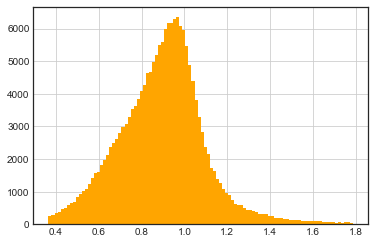

In [231]:
'''RENT RATIO:
    calculated from actual_rate / estimated_rent;
    there are observations close to zero
    and many times estimated_rent
    TODO: ask rob how to deal with these'''

# parameters: column
desc_stat_col('rent_ratio')

# parameters: column, bins, lower_pct, upper_pct, color
make_hist('rent_ratio', 100, .01, .99, 'orange')

# # observations where rent is btw 0 & 1% of estimated
# print(dfm.rent_ratio[(dfm.rent_ratio < 0.01) & (dfm.rent_ratio > 0.0)]:.3f)

# parameters: column, lower, upper 
create_tag_column('rent_ratio', .01, .99)

In [235]:
dfm.to_csv('top100_clean_tagged.csv')